1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

0.0037780525408761534


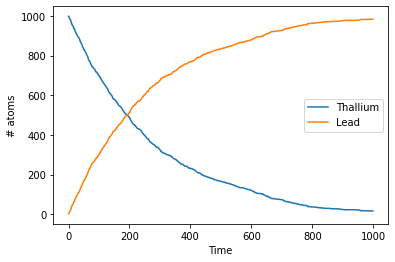

In [27]:
tau=3.052*60 #second
tl=1000
pb=0

tl_ar=[]
pb_ar=[]
time=np.arange(0,1000)

def prob(t,tau):
    p=1-pow(2,-t/tau)
    return p

for t in time:
    for count in range(0,tl):
        if np.random.uniform(0,1) < prob(1,tau):
            tl = tl - 1     
            pb = pb + 1
            
    tl_ar.append(tl)        
    pb_ar.append(pb)
    
plt.plot(time,tl_ar, label='Thallium')
plt.plot(time,pb_ar, label='Lead')
plt.ylabel('# atoms')
plt.xlabel('Time')
plt.legend()

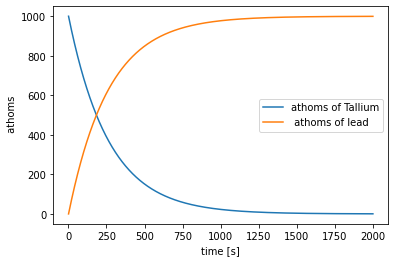

In [56]:
#SBAGLIATO
T=2000 #max timestep
time=np.linspace(1,T,T)
N= 1000 #atoms initial time
TL=np.zeros((T)) #1000 atomi al tempo t=0, tutti non decaduti
LE=np.zeros((T)) #0 atomi al tempo t=0
tau=3.052*60

for t in range(T):
    TL[t]=(2**(-t/tau))*N
    LE[t]=(1-2**(-t/tau))*N
    
plt.plot(time,TL, label='athoms of Tallium')
plt.plot(time,LE, label=' athoms of lead')
plt.ylabel(' athoms')
plt.xlabel('time [s]')
plt.legend()
plt.show()


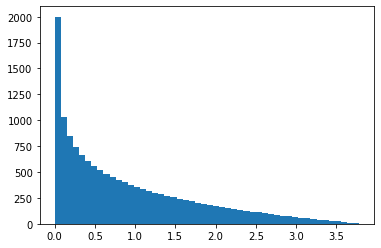

In [67]:
TL=np.zeros((T)) #1000 atomi al tempo t=0, tutti non decaduti

for t in range(T):
    TL[t]= 2**(-t/tau)*np.log(2)/tau*N

plt.hist(TL, bins=50,cumulative=-1)
plt.show()

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam (fascio) is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [19]:
Z=79
e = 1.602176565 * 10**(-19)
E = 7.7 * 10**(6) * e
a = 5.2917721067 * 10**(-11)
eps = 8.8541878176 * 10**(-12)
N=10**6 #1 million of particles

x = np.random.normal(0, a/100, N)
y = np.random.normal(0, a/100, N)
b=np.sqrt(x**2+y**2)

th=2*np.arctan(Z*e**2/(2*np.pi*E*b*eps))

count=0
for i in range(N):
    if th[i]>np.pi/2:
        count+=1
print("Percentage of bounced back particle: ", float(count/N*100),'%')

#print("Percentage of bounced back particle: ",(float(len(th[th>np.pi/2]))/N)*100,"%")

Percentage of bounced back particle:  0.1634 %


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

monte carlo hit/miss integration result: 1.450562
monte carlo hit/miss integration result: 0.0005981392434856857


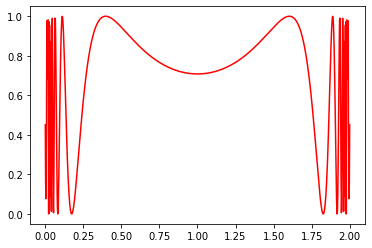

In [3]:
def f(x):
     return pow(np.sin(1/(x*(2-x))),2)
X=np.linspace(0.001,1.999,1000)
plt.plot(X,f(X),'r-')

I=0
N=1000000  # monte carlo iterations
for i in range(N):
    x=2*np.random.random() #un numero random tra 0 e 2
    y= np.random.random() #un random tra 0 e 1
    if x!=0:
        if y<=f(x): I+=1
I=2*I/N  #2*1=vol tot, /N densita
print('monte carlo hit/miss integration result:', I) 
print('monte carlo hit/miss integration result:' , 0.67*np.sqrt(I*(2-I)/N))


In [143]:
def f(x):
     return pow(np.sin(1/(x*(2-x))),2)
X=np.linspace(0.001,1.999,1000)

mean=0
N=100000
x_rand=np.zeros([N]) #per i numeri (x) random 
for i in range(N):
    x=np.random.random()*2
    if x!=0:
        x_rand[i]=x
        mean+=f(x)/N

var=0
for i in range(N):
    var+=pow((f(x_rand[i])-mean),2)/N
print(var)
print('monte carlo mean method integration result:', mean*(2))
print('monte carlo mean method integration error:', np.sqrt(var/N)*2)

0.06866726307300532
monte carlo mean method integration result: 1.4529381203670462
monte carlo mean method integration error: 0.0016573142498995815


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [15]:
def f(x,y):
    r=x**2+y**2
    if r<=1:
        return 1
    if r>0:
        return 0

N=1000000
I=0
for i in range(N):
    x=np.random.random()*2-1
    y=np.random.random()*2-1
    I+=f(x,y)

print(I*4/N)

3.142628


In [191]:
def f(x):
    a = sum(z**2 for z in x)
    if a <=1: 
        return 1
    else: 
        return 0

N=100000
I=0

for i in range(N):
    x = np.random.uniform(-1,1,10) #10 dimensional sphere
    I+=f(x)
print(2**10*I/N)

2.4064


5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

$$
I = \left\langle \frac{f(x)}{w(x)}\right\rangle \int_a^b w(x)dx \simeq \frac{1 or b-a?}{N}\sum_{i=1}^N \frac{f(x_i)}{w(x_i)}\int_a^b w(x)dx
$$

In [20]:
def f(x):
    return pow(x,-0.5)/(np.exp(x)+1)

def w(x):
    return pow(x,-0.5)

N=100000 #montecarlo steps
I=0
for i in range(N):
    x=np.random.random()
    I+=f(x*x)/w(x*x)

I=(1/N)*I*2  #where the last '2' is the integral(w)dx from 0 to 1
print(I)

0.8380252308799091
